In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
class PimpMyNet(nn.Module):
    def __init__(self):
        super(PimpMyNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(1024, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        return x

In [3]:
def calculate_metrics(loader, model):
    y_true = []
    y_pred = []
    model.eval()
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.numpy())
            y_true.extend(labels.numpy())

    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, recall, precision, f1

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
valset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader = DataLoader(valset, batch_size=64, shuffle=False)


net = PimpMyNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)



cnn_losses = []
cnn_accuracies = []


for epoch in range(2):
    running_loss = 0.0
    net.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()



    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader):.3f}')

    train_acc, train_rec, train_prec, train_f1 = calculate_metrics(trainloader, net)
    print(f'Training - Accuracy: {train_acc}, Recall: {train_rec}, Precision: {train_prec}, F1 Score: {train_f1}')

    val_acc, val_rec, val_prec, val_f1 = calculate_metrics(valloader, net)
    print(f'Validation - Accuracy: {val_acc}, Recall: {val_rec}, Precision: {val_prec}, F1 Score: {val_f1}')


    cnn_losses.append(running_loss / len(trainloader))
    cnn_accuracies.append(val_acc)

print('Finished Training')

Epoch 1, Loss: 0.164
Training - Accuracy: 0.9843833333333334, Recall: 0.9841846020276126, Precision: 0.9845839426948597, F1 Score: 0.9843487819974166
Validation - Accuracy: 0.9843, Recall: 0.9841246350310694, Precision: 0.984509218951883, F1 Score: 0.9842691559935771
Epoch 2, Loss: 0.049
Training - Accuracy: 0.9897666666666667, Recall: 0.9896853052446566, Precision: 0.9897430042720787, F1 Score: 0.9896865210139945
Validation - Accuracy: 0.9884, Recall: 0.9883110800169753, Precision: 0.9883952980996593, F1 Score: 0.9883170125138199
Finished Training


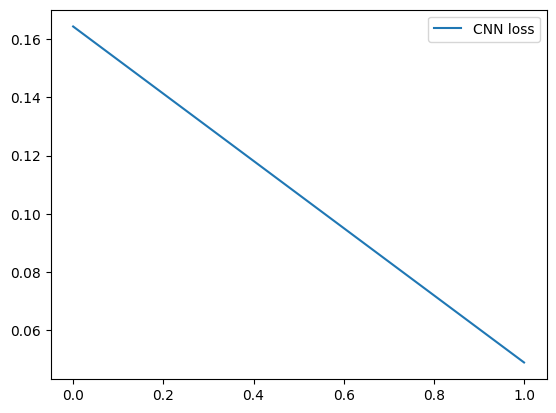

In [5]:
plt.plot(list(range(len(cnn_losses))), cnn_losses, label='CNN loss')
plt.legend()

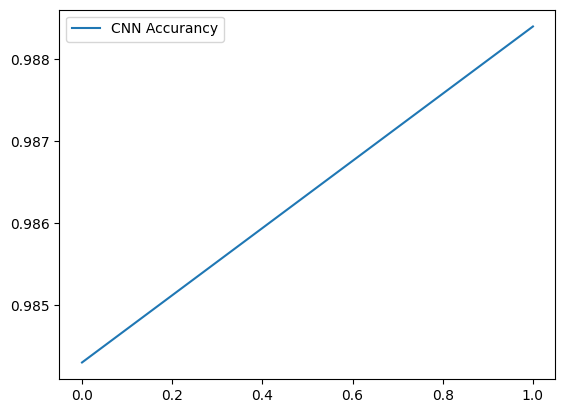

In [6]:
plt.plot(list(range((len(cnn_accuracies)))), cnn_accuracies, label='CNN Accurancy')
plt.legend()

In [7]:

class FullyConnectedNet(nn.Module):
    def __init__(self):
        super(FullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 28*28 // 2)
        self.fc2 = nn.Linear(28*28 // 2, 28*28 // 2 // 2)
        self.fc3 = nn.Linear(28*28 // 2 // 2, 28*28 // 2 // 2 // 2)
        self.fc4 = nn.Linear(28*28 // 2 // 2 // 2, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [8]:
net = FullyConnectedNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


fully_connected_net_losses = []
fully_connected_net_accuracies = []


for epoch in range(7):
    running_loss = 0.0
    net.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()



    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader):.3f}')

    train_acc, train_rec, train_prec, train_f1 = calculate_metrics(trainloader, net)
    print(f'Training - Accuracy: {train_acc}, Recall: {train_rec}, Precision: {train_prec}, F1 Score: {train_f1}')

    val_acc, val_rec, val_prec, val_f1 = calculate_metrics(valloader, net)
    print(f'Validation - Accuracy: {val_acc}, Recall: {val_rec}, Precision: {val_prec}, F1 Score: {val_f1}')

    fully_connected_net_losses.append(running_loss / len(trainloader))
    fully_connected_net_accuracies.append(val_acc)

print('Finished Training')

Epoch 1, Loss: 0.472
Training - Accuracy: 0.9193333333333333, Recall: 0.917958514815538, Precision: 0.9244396211310132, F1 Score: 0.9179762540029965
Validation - Accuracy: 0.9195, Recall: 0.9183648611377716, Precision: 0.9245287403580372, F1 Score: 0.9182299079572769
Epoch 2, Loss: 0.160
Training - Accuracy: 0.96095, Recall: 0.9606031771720025, Precision: 0.9614096516960668, F1 Score: 0.9605933681632545
Validation - Accuracy: 0.9568, Recall: 0.9563623695915282, Precision: 0.9572455520446418, F1 Score: 0.9563612701297218
Epoch 3, Loss: 0.116
Training - Accuracy: 0.972, Recall: 0.9719742361271093, Precision: 0.9718785995127105, F1 Score: 0.9716978972979513
Validation - Accuracy: 0.9666, Recall: 0.9666820146850489, Precision: 0.9665089713303324, F1 Score: 0.9663374272283782
Epoch 4, Loss: 0.090
Training - Accuracy: 0.9808833333333333, Recall: 0.9807168723754345, Precision: 0.9810280119817444, F1 Score: 0.9808141422528683
Validation - Accuracy: 0.9725, Recall: 0.9721403059219114, Precision

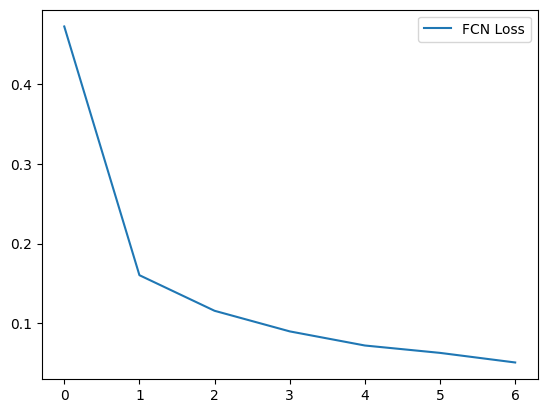

In [9]:
plt.plot(list(range(len(fully_connected_net_losses))), fully_connected_net_losses, label='FCN Loss')
plt.legend()

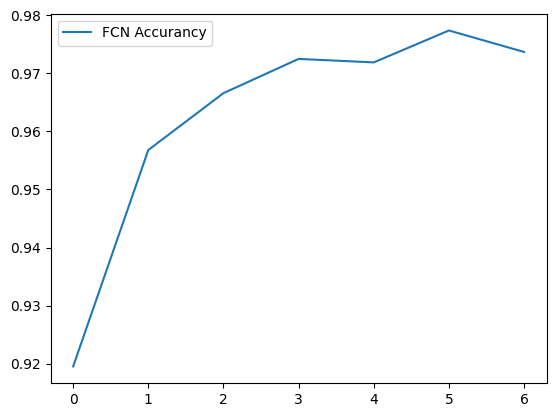

In [10]:
plt.plot(list(range(len(fully_connected_net_accuracies))), fully_connected_net_accuracies, label='FCN Accurancy')
plt.legend()